In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
import os
drive_path = '/content/drive/My Drive/musicautobot'
print(os.getcwd())
if not os.getcwd() == drive_path:
    os.chdir(drive_path)
#os.chdir('drive/MyDrive/musicautobot')
!ls 

/content
data		 images      musicautobot  README.md  serve
environment.yml  LICENSE.md  notebooks	   scripts


In [ ]:
pip install musdl

     |████████████████████████████████| 122kB 12.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install pebble

In [ ]:
from musicautobot.numpy_encode import *
from musicautobot.config import *
from musicautobot.music_transformer import *

ModuleNotFoundError: ignored

## MusicTransformer Training

MusicTransformer takes the basic idea of [Language Models](https://en.wikipedia.org/wiki/Language_model) and applies it to Music.  

Given a sequence of notes, predict the next most likely set of notes.

This model is based off of [transformer-XL](https://arxiv.org/abs/1901.02860) and uses fast.ai's [implementation](https://github.com/fastai/fastai/blob/master/fastai/text/models/transformer.py) of it.

In [ ]:
# Location of your midi filesfiles
midi_path = Path('data/midi/examples')
midi_path.mkdir(parents=True, exist_ok=True)

# Location to save dataset
data_path = Path('data/numpy')
data_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save_10songs.pkl'

## 1. Gather midi dataset

Make sure all your midi data is in `musicautobot/data/midi` directory

Here's a pretty good dataset with lots of midi data:  
https://www.reddit.com/r/datasets/comments/3akhxy/the_largest_midi_collection_on_the_internet/

Download the folder and unzip it to `data/midi`

## 2. Create dataset from MIDI files

In [ ]:
midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)

19

In [ ]:
processors = [Midi2ItemProcessor()]
data = MusicDataBunch.from_files(midi_files, data_path, processors=processors, bs=2, bptt=12)
data.save(data_save_name)

yoo
hh
<class 'fastai.text.data.LMLabelList'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bunch', '_get_by_folder', '_label_cls', '_label_from_list', '_processor', '_relative_item_path', '_relative_item_paths', '_square_show', '_square_show_res', 'add', 'analyze_pred', 'databunch', 'filter_by_folder', 'filter_by_func', 'filter_by_rand', 'from_csv', 'from_df', 'from_folder', 'get', 'get_label_cls', 'label_const', 'label_empty', 'label_from_df', 'label_from_folder', 'label_from_func', 'label_from_re', 'new', 'no_split', 'process', 'process_one', 'random_split_by_pct', 'reconstruct', 'split_by_files', 'split_by_fname_file', 'split_by_folder', 'split_by_idx', 'split_

In [ ]:
data = load_data(data_path, data_save_name, 
                    bs=batch_size, bptt=bptt, encode_position=True,
                    dl_tfms=mask_lm_tfm_pitchdur)

NameError: ignored

In [ ]:
# Show Data
data.train_dl.on_epoch_begin()
x, y = data.one_batch();
x, y

(tensor([[[  0,   0],
          [  1,   0],
          [  8,   0],
          [149,   0],
          [ 89,  12],
          [138,  12],
          [  8,  12],
          [138,  12],
          [ 89,  13],
          [138,  13],
          [  8,  13],
          [138,  13]],
 
         [[139,  18],
          [  8,  18],
          [139,  18],
          [ 66,  20],
          [139,  20],
          [  8,  20],
          [139,  20],
          [ 66,  22],
          [139,  22],
          [  8,  22],
          [139,  22],
          [ 60,  24]]]), tensor([[[  1,   0],
          [  8,   0],
          [149,   0],
          [ 89,  12],
          [138,  12],
          [  8,  12],
          [138,  12],
          [ 89,  13],
          [138,  13],
          [  8,  13],
          [138,  13],
          [ 89,  14]],
 
         [[  8,  18],
          [139,  18],
          [ 66,  20],
          [139,  20],
          [  8,  20],
          [139,  20],
          [ 66,  22],
          [139,  22],
          [  8,  22],
  

## 3. Load Model

In [ ]:
batch_size = 1
encode_position = True
dl_tfms = [batch_position_tfm] if encode_position else []
data = load_data(data_path, data_save_name, bs=batch_size, encode_position=encode_position, dl_tfms=dl_tfms)

In [ ]:
config = default_config()
config['encode_position'] = encode_position
learn = music_model_learner(data, config=config.copy())


## 4. Train

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,3.320531,3.244845,0.158350,03:36
1,3.185414,3.563507,0.158350,03:37
2,2.831698,2.951723,0.335614,03:38
3,3.369458,3.314273,0.158350,03:39
4,2.835931,3.124541,0.335614,03:39
5,2.798989,2.879368,0.335614,03:39
6,3.021461,2.993395,0.335614,03:43
7,3.206407,2.980906,0.335614,03:44


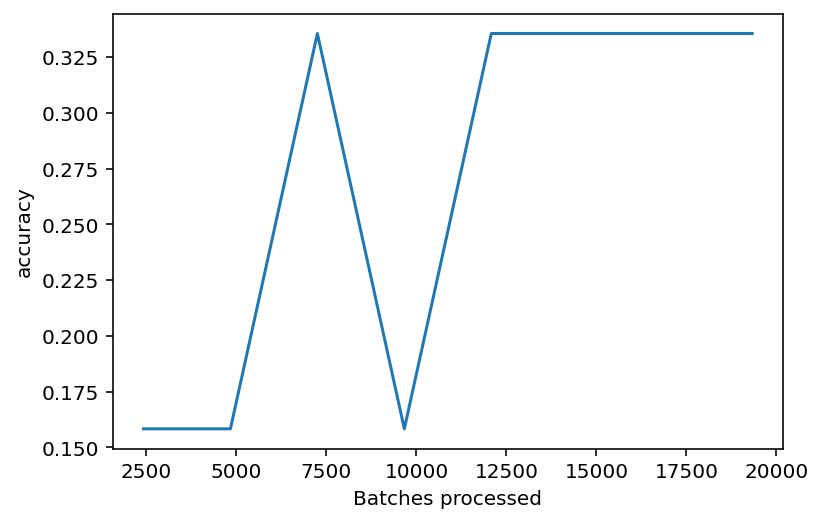

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.model

SequentialRNN(
  (0): MusicTransformerXL(
    (encoder): Embedding(312, 512)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1, inplace=False)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=512, out_features=1536, bias=False)
          (out): Linear(in_features=512, out_features=512, bias=False)
          (drop_att): Dropout(p=0.1, inplace=False)
          (drop_res): Dropout(p=0.1, inplace=False)
          (ln): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=512, out_features=512, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=512, out_features=2048, bias=True)
            (1): GeLU()
            (2): Dropout(p=0.1, inplace=False)
            (3): Linear(in_features=2048, out_features=512, bias=True)
            (4): Dropout(p=0.1, inplace=False)
            (5): Me

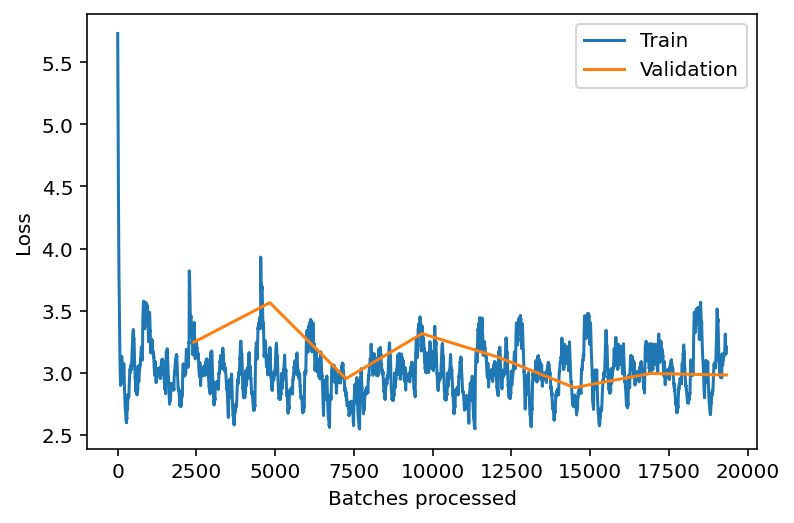

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('trained_4_epocs_10_songs')

PosixPath('data/numpy/models/trained_4_epocs_10_songs.pth')

## 5. Predict

---
See [Generate.ipynb](Generate.ipynb) to use a pretrained model and generate better predictions

---

In [ ]:
midi_file = Path('data/midi/2004_small/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi'); midi_file
item = MusicItem.from_file(midi_file, data.vocab);

In [ ]:
item.show()

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 

KeyboardInterrupt: ignored

Here's what the seed sounds like:

### Start Predictions:

In [ ]:
pred, full = learn.predict(item, n_words=100)

Prediction

In [ ]:
from io import StringIO
#dir(pred)




<music21.stream.Score 0x7fe006586be0>

In [ ]:
import pickle
import os

In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1rAi4myTHQ-gqD66YZmwkn_6eWjiUlIcY/musicautobot'

In [ ]:
with open('data_pred.pickle', 'wb') as f:
  pickle.dump(pred, f)

In [ ]:
!ls

data		  environment.yml  LICENSE.md	 notebooks  scripts
data_pred.pickle  images	   musicautobot  README.md  serve


In [ ]:
pred.to_text()

'n33 d0 n110 d103 n0 d80 n126 xxnscls d39 xxnscls d85 n16 d74 n108 d105 n80 d103 dummy1 dummy1 d84 n60 d32 xxmask d109 n18 d92 n91 xxpad n1 dummy1 dummy1 dummy1 d62 n110 d97 n37 xxnscls d158 n40 d12 n45 d85 n63 dummy1 d160 n41 d44 dummy1 d152 n28 d103 n74 d85 n8 d27 n69 d97 n34 d100 n1 d0 n121 d0 n114 d115 n28 d97 n19 d160 n96 d109 n63 d121 n24 d57 n14 d151 n28 d83 n126 d56 dummy1 d109 n126 d32 n110 d103 n110 d115 n34 d109 n48 d86 n18 d78 n91 d85 n12 d74 n108'

In [ ]:
# Prediction
#pred.show()
#dir(pred)

In [ ]:
pred.play()